In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.


Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [62]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 1, 1, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [63]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 1, 1, 64)          36928     
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
__________

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 2s 0us/step


#### compile and fit model 

In [64]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 15s 313us/step - loss: 0.4938 - acc: 0.8426 - val_loss: 0.0990 - val_acc: 0.9686
Epoch 2/5
48000/48000 [==============================] - 14s 292us/step - loss: 0.1691 - acc: 0.9497 - val_loss: 0.0634 - val_acc: 0.9802
Epoch 3/5
48000/48000 [==============================] - 15s 313us/step - loss: 0.1248 - acc: 0.9634 - val_loss: 0.0563 - val_acc: 0.9838
Epoch 4/5
48000/48000 [==============================] - 15s 319us/step - loss: 0.1056 - acc: 0.9687 - val_loss: 0.0504 - val_acc: 0.9854
Epoch 5/5
48000/48000 [==============================] - 14s 293us/step - loss: 0.0897 - acc: 0.9722 - val_loss: 0.0450 - val_acc: 0.9877


#### evaluate model

In [65]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 109us/step


0.9898

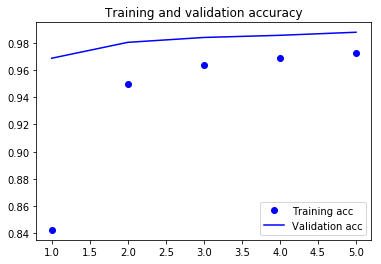

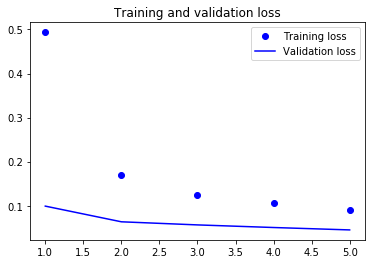

In [66]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

** Exercise:  **

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance.